In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import Xception

In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
img = cv2.imread('q4_input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(224,224), interpolation = cv2.INTER_AREA)[:,:]

In [5]:
X = np.expand_dims(img, axis = 0).astype(np.float32)
X = preprocess_input(X)

In [6]:
res_model = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [7]:
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [8]:
from tensorflow.keras.models import Model
conv_output = res_model.get_layer("conv5_block3_out").output
pred_output = res_model.get_layer('predictions').output

model = Model(res_model.input, outputs = [conv_output,pred_output])

In [9]:
conv, pred = model.predict(X)

In [10]:
decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n02123045', 'tabby', 0.34811136),
  ('n02123159', 'tiger_cat', 0.2841755),
  ('n04265275', 'space_heater', 0.060687065),
  ('n02124075', 'Egyptian_cat', 0.019644953),
  ('n03958227', 'plastic_bag', 0.016705552)]]

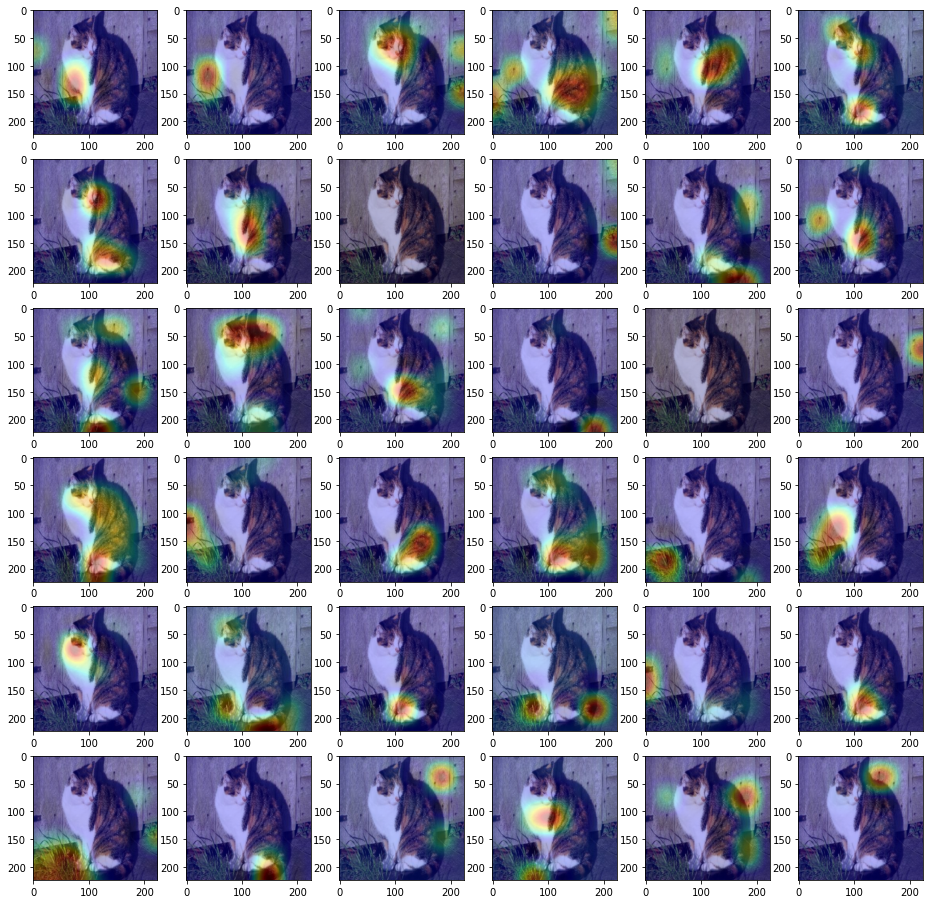

In [11]:
scale = 224 / 7
plt.figure(figsize=(16, 16))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(img)
    plt.imshow(zoom(conv[0, :,:,i], zoom=(scale, scale)), cmap='jet', alpha=0.3)

In [12]:
target = np.argmax(pred, axis=1).squeeze()
w, b = model.get_layer("predictions").weights
weights = w[:, target].numpy()
heatmap = conv.squeeze() @ weights

In [13]:
conv.squeeze().shape

(7, 7, 2048)

In [14]:
weights.shape

(2048,)

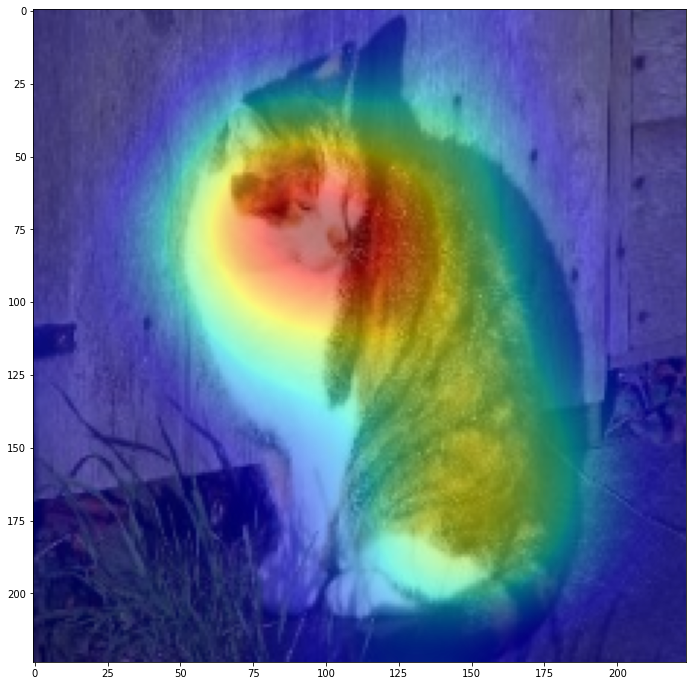

In [ ]:
scale = 224 / 7
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.imshow(zoom(heatmap, zoom=(scale, scale)), cmap='jet', alpha=0.5)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)

In [ ]:
model.save('Effi')

INFO:tensorflow:Assets written to: Effi/assets


In [ ]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model = ResNet50(weights='imagenet')

img_path = '/content/fish.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
# plt.imshow(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
# print(x)
preds = model.predict(x)
print(len(preds[0]))
print(preds)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1000
[[5.58638036e-01 1.98497484e-03 7.71633495e-06 3.77513497e-05
  6.96490088e-06 5.11579122e-03 5.55906297e-07 1.72295842e-07
  1.02165802e-06 3.62147889e-09 1.29704381e-06 2.01493606e-07
  1.09172618e-07 8.20876451e-08 2.12158824e-07 1.23944488e-07
  1.34504376e-06 1.33205305e-07 1.72825168e-08 7.41321458e-08
  5.00649037e-07 6.80209314e-06 3.46838391e-07 4.51338252e-07
  5.77584842e-07 3.23697094e-07 1.33008944e-05 1.08409549e-05
  2.70877877e-06 8.41074961e-06 4.54986821e-06 8.47162084e-07
  2.07459925e-05 1.63037384e-06 9.22395066e-06 3.57194790e-06
  4.54409656e-06 1.95622192e-07 4.21490295e-05 1.43864611e-06
  6.24832694e-07 3.13817736e-06 3.75342165e-06 1.18421149e-05
  1.34666857e-06 4.77456183e-07 2.23588060e-07 1.68259849e-05
  1.73596504e-07 1.50952332e-07 1.63693059e-07 7.89176265e-04
  1.28051965e-07 1.65820229e-08 1.15639310e-07 1.67462289e-07
  5.94488858e-09 4.19053983e-08 5.43169563e-07 1.49517575e-07
  2.32181279e-07 5.16164391e-08 4.42679919e-07 4.67923599e-07
  1

In [ ]:
def MapValToClass(a):
  x = ['beauty','family','fashion','fitness','food']
  return x[a]

In [ ]:
model = VGG16(include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(model)

keras.engine.functional.Functional

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

In [ ]:
inner_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
dff = pd.read_csv('file_name.csv')

In [ ]:
len(dff)

1500

In [ ]:
dff.head()

,Unnamed: 0,filename,class
0,0,1208_sj.jpg,beauty
1,1,15minbeauty.jpg,beauty
2,2,54artistry.jpg,beauty
3,3,a1delatorre.jpg,beauty
4,4,aaqshah.jpg,beauty


In [ ]:
dff = dff.drop(['Unnamed: 0'],axis=1)

In [ ]:
dff.head()

,filename,class
0,1208_sj.jpg,beauty
1,15minbeauty.jpg,beauty
2,54artistry.jpg,beauty
3,a1delatorre.jpg,beauty
4,aaqshah.jpg,beauty


In [ ]:
from google.colab import files

dff.to_csv('Dataset1500.csv')
files.download('Dataset1500.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Transfer Learning**

In [ ]:
#import required libraries — we do need the models, flatten, dense, input layers 
import cv2
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_csv('Dataset1500.csv')
print(np.unique(df['class']))
df['Class'] = df['class'].replace(['beauty','family','fashion','fitness','food'],[1,2,3,4,5])
df

['beauty' 'family' 'fashion' 'fitness' 'food']


,Unnamed: 0,filename,class,Class
0,0,1208_sj.jpg,beauty,1
1,1,15minbeauty.jpg,beauty,1
2,2,54artistry.jpg,beauty,1
3,3,a1delatorre.jpg,beauty,1
4,4,aaqshah.jpg,beauty,1
...,...,...,...,...
1495,1495,jo.bedford.jpg,fitness,4
1496,1496,joembayawaphotography.jpg,fitness,4
1497,1497,joesthetics.jpg,fitness,4
1498,1498,joey.gentile.jpg,fitness,4


In [ ]:
len(df)

1500

In [ ]:
import copy
images = []
Ytrue = []
for i in range(len(df)):
  image_name = df.iloc[i]['filename']
  classs = df.iloc[i]['class']
  image = cv2.imread(image_name)
  if image is None:
    print(image_name,classs)
    pass
  else:
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    output=image[:,:]
    images.append(output)
    Ytrue.append(df.iloc[i]['class'])

In [ ]:
len(Ytrue)
len(images)

images=np.array(images)
print(images.shape)
Ytrue=np.array(Ytrue)

images = images / 255.0

(1500, 224, 224, 3)


In [ ]:
y = pd.get_dummies(df.Class, prefix='Class')
y=y.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
split = train_test_split(images, y, test_size=0.25, random_state=0)
(trainX, testX, trainY, testY) = split

In [ ]:
res = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in res.layers:
  layer.trainable = False
x = Flatten()(res.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(5, activation='softmax')(x) # We have 2 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=res.input, outputs=prediction)
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
# # Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
# vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
# # This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
# for layer in vgg.layers:
#   layer.trainable = False
# x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
# prediction = Dense(5, activation='softmax')(x) # We have 2 classes, and so, the prediction is being done on len(folders) - 5 classes
# #Creating model object 
# model = Model(inputs=vgg.input, outputs=prediction)
# model.summary()

In [ ]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall']) 
history = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

Epoch 1/20
36/36 [==============================] - 241s 7s/step - loss: 6.4890 - accuracy: 0.2400 - precision: 0.2385 - recall: 0.2160 - val_loss: 3.8181 - val_accuracy: 0.3227 - val_precision: 0.3295 - val_recall: 0.3040
Epoch 2/20
36/36 [==============================] - 231s 6s/step - loss: 1.8451 - accuracy: 0.4782 - precision: 0.5265 - recall: 0.3707 - val_loss: 1.7400 - val_accuracy: 0.3227 - val_precision: 0.3324 - val_recall: 0.3067
Epoch 3/20
36/36 [==============================] - 233s 7s/step - loss: 1.0962 - accuracy: 0.5689 - precision: 0.6676 - recall: 0.4320 - val_loss: 1.5266 - val_accuracy: 0.3600 - val_precision: 0.3769 - val_recall: 0.3227
Epoch 4/20
36/36 [==============================] - 232s 6s/step - loss: 0.9503 - accuracy: 0.6258 - precision: 0.6965 - recall: 0.4978 - val_loss: 2.7611 - val_accuracy: 0.2640 - val_precision: 0.2615 - val_recall: 0.2587
Epoch 5/20
36/36 [==============================] - 231s 6s/step - loss: 1.2569 - accuracy: 0.5529 - precisi

KeyboardInterrupt: ignored

In [ ]:
acc=history.history['accuracy']
prec=history.history['precision']
rec=history.history['recall']

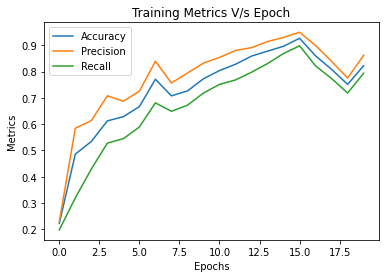

In [ ]:
plt.plot(acc)
plt.plot(prec)
plt.plot(rec)
plt.title('Training Metrics V/s Epoch')
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='upper left')
plt.show()

In [ ]:
val_acc=history.history['val_accuracy']
val_prec=history.history['val_precision']
val_rec=history.history['val_recall']

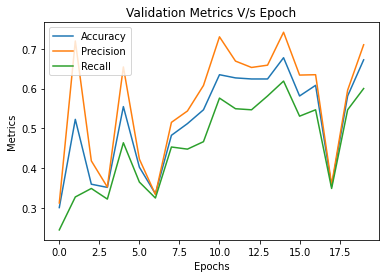

In [ ]:
plt.plot(val_acc)
plt.plot(val_prec)
plt.plot(val_rec)
plt.title('Validation Metrics V/s Epoch')
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='upper left')
plt.show()

In [ ]:
df1 = pd.read_csv('TestSet.csv')
print(np.unique(df1['class']))
df1['Class'] = df1['class'].replace(['beauty','family','fashion','fitness','food'],[0,1,2,3,4])
df1

['beauty' 'family' 'fashion' 'fitness' 'food']


,Unnamed: 0,filename,class,Class
0,0,jessiesoffi.jpg,beauty,0
1,1,jewejewebee.jpg,beauty,0
2,2,jmcdaniel87.jpg,beauty,0
3,3,johannaherrstedt.jpg,beauty,0
4,4,joos_makeup.jpg,beauty,0
...,...,...,...,...
495,495,london_fitness_guy.jpg,fitness,3
496,496,loroxburgh.jpg,fitness,3
497,497,lozziebrown_yoga.jpg,fitness,3
498,498,lucasloboh.jpg,fitness,3


In [ ]:
import copy
images1 = []
Ytrue1 = []
for i in range(len(df1)):
  image_name = df1.iloc[i]['filename']
  classs = df1.iloc[i]['class']
  image = cv2.imread(image_name)
  if image is None:
    print(image_name,classs)
    pass
  else:
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    output=image[:,:]
    images1.append(output)
    Ytrue1.append(df1.iloc[i]['Class'])

In [ ]:
len(Ytrue1)
len(images1)

images1=np.array(images1)
print(images1.shape)
Ytrue1=np.array(Ytrue1)

images1 = images1 / 255.0

(500, 224, 224, 3)


In [ ]:
testy = pd.get_dummies(df1.Class, prefix='Class')
testy=testy.to_numpy()

In [ ]:
predy = model.predict(images1)

In [ ]:
predy

array([[1.0000000e+00, 2.1822196e-14, 2.9873968e-11, 7.2049880e-11,
        2.7089145e-22],
       [9.9991179e-01, 4.0654784e-05, 3.3655888e-05, 1.3958168e-05,
        1.1261831e-13],
       [9.9999928e-01, 4.5675228e-09, 4.6764714e-07, 2.8693330e-07,
        1.6540914e-14],
       ...,
       [1.7330969e-07, 2.5495472e-06, 3.4033608e-01, 6.5966117e-01,
        1.0994490e-14],
       [9.9769694e-01, 1.7877723e-09, 2.3091098e-09, 2.3030865e-03,
        4.1113518e-15],
       [8.7147260e-01, 1.0512406e-03, 1.4259445e-03, 1.2605020e-01,
        3.3413401e-11]], dtype=float32)

In [ ]:
predy.shape

(500, 5)

In [ ]:
ans = np.argmax(predy,axis=1)

In [ ]:
Ytrue1 = Ytrue1.astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
ans

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 2, 3, 0, 1,
       1, 1, 2, 1, 1, 1, 4, 0, 0, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 0,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print(accuracy_score(Ytrue1,ans))
print(precision_score(Ytrue1,ans, average='weighted'))
print(recall_score(Ytrue1,ans, average='weighted'))

0.81
0.807383596058962
0.81


Xception

In [ ]:
xce = Xception(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in xce.layers:
  layer.trainable = False
x = Flatten()(xce.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(5, activation='softmax')(x) # We have 2 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=xce.input, outputs=prediction)
model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [ ]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall']) 
history = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=20, batch_size=32)

Epoch 1/20
36/36 [==============================] - 239s 7s/step - loss: 3.8730 - accuracy: 0.5618 - precision: 0.5783 - recall: 0.5547 - val_loss: 2.2147 - val_accuracy: 0.6747 - val_precision: 0.6792 - val_recall: 0.6720
Epoch 2/20
36/36 [==============================] - 235s 7s/step - loss: 0.7746 - accuracy: 0.8382 - precision: 0.8429 - recall: 0.8347 - val_loss: 2.0440 - val_accuracy: 0.7173 - val_precision: 0.7173 - val_recall: 0.7173
Epoch 3/20
36/36 [==============================] - 250s 7s/step - loss: 0.1640 - accuracy: 0.9422 - precision: 0.9454 - recall: 0.9396 - val_loss: 1.2841 - val_accuracy: 0.7707 - val_precision: 0.7769 - val_recall: 0.7707
Epoch 4/20
36/36 [==============================] - 255s 7s/step - loss: 0.0634 - accuracy: 0.9698 - precision: 0.9715 - recall: 0.9689 - val_loss: 1.2353 - val_accuracy: 0.7733 - val_precision: 0.7811 - val_recall: 0.7707
Epoch 5/20
36/36 [==============================] - 256s 7s/step - loss: 0.0436 - accuracy: 0.9876 - precisi

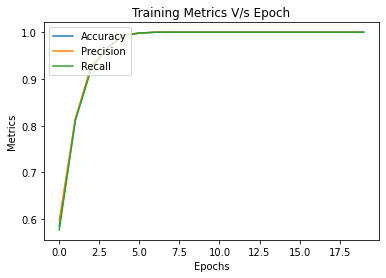

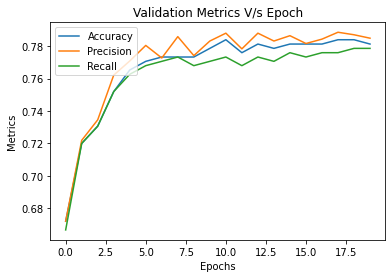

In [ ]:
acc=history.history['accuracy']
prec=history.history['precision']
rec=history.history['recall']
plt.plot(acc)
plt.plot(prec)
plt.plot(rec)
plt.title('Training Metrics V/s Epoch')
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='upper left')
plt.show()
val_acc=history.history['val_accuracy']
val_prec=history.history['val_precision']
val_rec=history.history['val_recall']
plt.plot(val_acc)
plt.plot(val_prec)
plt.plot(val_rec)
plt.title('Validation Metrics V/s Epoch')
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Precision', 'Recall'], loc='upper left')
plt.show()

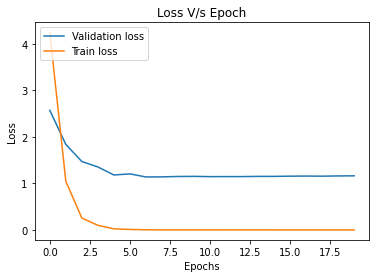

In [ ]:
val_loss=history.history['val_loss']
loss=history.history['loss']
plt.plot(val_loss)
plt.plot(loss)
plt.title('Loss V/s Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Validation loss', 'Train loss'], loc='upper left')
plt.show()

# b=b[40:]
# print(type(b))
# b = [elem*100 for elem in b]

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
model.save('XceptionModel')

INFO:tensorflow:Assets written to: XceptionModel/assets


In [ ]:
model = tf.keras.models.load_model('XceptionModel')

In [ ]:
Test1 = cv2.imread('15minbeauty.jpg')

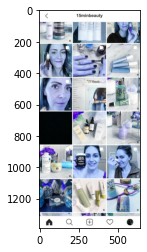

In [ ]:
plt.imshow(Test1)

In [ ]:
image = cv2.resize(Test1, (224, 224), interpolation=cv2.INTER_AREA)
output=image[:,:]

In [ ]:
output = output/255.0
a = []
print(output.shape)
a.append(output)
a = np.array(a)
a.shape
xy = model.predict(a)
ans = np.argmax(xy,axis=1)
MapValToClass(ans[0])

(224, 224, 3)


'beauty'